# **Estratificacion del dengue en el departamento del Cauca, Colombia**

En este proyecto, trabajaremos con los siguientes datasets

- `entomologico.csv` : Contiene registros de muestras de insectos recolectados en diferentes localidades del departamento del Cauca, en donde cada registro tiene informacion sobre el numero de individuos, genero, especie, fecha y lugar de recoleccion.

In [31]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import xarray as xr

plt.style.use('ggplot')


## **Carga de datos**

In [32]:

df_entomologico = pd.read_csv('../data/entomologico.csv')
df_cases = pd.read_csv('../data/cases.csv')

df_meteorologico_patia = pd.read_csv('../data/meteorologicos-patia.csv')
df_meteorologico_miranda = pd.read_csv('../data/meteorologicos-miranda.csv')
df_meteorologico_piamonte = pd.read_csv('../data/meteorologicos-piamonte.csv')

def read_as_df(file_name):
    # Read file
    ds = xr.open_dataset(file_name)
    # Convert to dataframe
    df = ds.to_dataframe()

    # Unstack index (coorfinates)
    ## Get position of the coorfinates in index
    coordinates = ['lat', 'lon']
    ## For each coordinate, reset index:
    for coordinate in coordinates:
        position_index = df.index.names.index(coordinate)
        #print(position_index)
        df = df.reset_index(position_index)
    
    return df

df_humedad_relativa = read_as_df("../data/humedad-relativa.nc").reset_index()
df_precipitacion = read_as_df("../data/precipitacion.nc").reset_index()
df_temp_max = read_as_df("../data/temp-maxima.nc").reset_index()
df_temp_min = read_as_df("../data/temp-minima.nc").reset_index()

## **Limpieza de datos**

In [33]:
# data cleaning: cambio de comas por puntos en los valores numericos de las columnas

df_meteorologico_patia['Temperatura media (°C)'] = df_meteorologico_patia['Temperatura media (°C)'].str.replace(',', '.')
df_meteorologico_patia['Temperatura máxima (°C)'] = df_meteorologico_patia['Temperatura máxima (°C)'].str.replace(',', '.')
df_meteorologico_patia['Temperatura mínima (°C)'] = df_meteorologico_patia['Temperatura mínima (°C)'].str.replace(',', '.')
df_meteorologico_patia['Humedad (%)'] = df_meteorologico_patia['Humedad (%)'].str.replace(',', '.')
df_meteorologico_patia['Precipitación (mm)'] = df_meteorologico_patia['Precipitación (mm)'].str.replace(',', '.')
df_meteorologico_patia['Índice de calor (°C)'] = df_meteorologico_patia['Índice de calor (°C)'].str.replace(',', '.')
df_meteorologico_patia['Fecha'] = pd.to_datetime(df_meteorologico_piamonte['Fecha'], dayfirst=True)

df_meteorologico_piamonte['Temperatura media (°C)'] = df_meteorologico_piamonte['Temperatura media (°C)'].str.replace(',', '.')
df_meteorologico_piamonte['Temperatura máxima (°C)'] = df_meteorologico_piamonte['Temperatura máxima (°C)'].str.replace(',', '.')
df_meteorologico_piamonte['Temperatura mínima (°C)'] = df_meteorologico_piamonte['Temperatura mínima (°C)'].str.replace(',', '.')
df_meteorologico_piamonte['Humedad (%)'] = df_meteorologico_piamonte['Humedad (%)'].str.replace(',', '.')
df_meteorologico_piamonte['Precipitación (mm)'] = df_meteorologico_piamonte['Precipitación (mm)'].str.replace(',', '.')
df_meteorologico_piamonte['Índice de calor (°C)'] = df_meteorologico_piamonte['Índice de calor (°C)'].str.replace(',', '.')
df_meteorologico_piamonte['Fecha'] = pd.to_datetime(df_meteorologico_piamonte['Fecha'], dayfirst=True)

df_meteorologico_miranda['Temperatura media (°C)'] = df_meteorologico_miranda['Temperatura media (°C)'].str.replace(',', '.')
df_meteorologico_miranda['Temperatura máxima (°C)'] = df_meteorologico_miranda['Temperatura máxima (°C)'].str.replace(',', '.')
df_meteorologico_miranda['Temperatura mínima (°C)'] = df_meteorologico_miranda['Temperatura mínima (°C)'].str.replace(',', '.')
df_meteorologico_miranda['Humedad (%)'] = df_meteorologico_miranda['Humedad (%)'].str.replace(',', '.')
df_meteorologico_miranda['Precipitación (mm)'] = df_meteorologico_miranda['Precipitación (mm)'].str.replace(',', '.')
df_meteorologico_miranda['Índice de calor (°C)'] = df_meteorologico_miranda['Índice de calor (°C)'].str.replace(',', '.')
df_meteorologico_miranda['Fecha'] = pd.to_datetime(df_meteorologico_miranda['Fecha'], format='mixed')

In [34]:

df_meteorologico_patia.dropna(subset=['Fecha'], inplace=True)
df_meteorologico_patia = df_meteorologico_patia.sort_values(by=['Fecha'], ascending=True)
df_meteorologico_patia['Temperatura media (°C)'] = df_meteorologico_patia['Temperatura media (°C)'].astype(float)
df_meteorologico_patia['Temperatura máxima (°C)'] = df_meteorologico_patia['Temperatura máxima (°C)'].astype(float)
df_meteorologico_patia['Temperatura mínima (°C)'] = df_meteorologico_patia['Temperatura mínima (°C)'].astype(float)
df_meteorologico_patia['Humedad (%)'] = df_meteorologico_patia['Humedad (%)'].astype(float)
df_meteorologico_patia['Precipitación (mm)'] = df_meteorologico_patia['Precipitación (mm)'].astype(float)
df_meteorologico_patia['Índice de calor (°C)'] = df_meteorologico_patia['Índice de calor (°C)'].astype(float)

df_meteorologico_piamonte.dropna(subset=['Fecha'], inplace=True)
df_meteorologico_piamonte = df_meteorologico_piamonte.sort_values(by=['Fecha'], ascending=True)
df_meteorologico_piamonte['Temperatura media (°C)'] = df_meteorologico_piamonte['Temperatura media (°C)'].astype(float)
df_meteorologico_piamonte['Temperatura máxima (°C)'] = df_meteorologico_piamonte['Temperatura máxima (°C)'].astype(float)
df_meteorologico_piamonte['Temperatura mínima (°C)'] = df_meteorologico_piamonte['Temperatura mínima (°C)'].astype(float)
df_meteorologico_piamonte['Humedad (%)'] = df_meteorologico_piamonte['Humedad (%)'].astype(float)
df_meteorologico_piamonte['Precipitación (mm)'] = df_meteorologico_piamonte['Precipitación (mm)'].astype(float)
df_meteorologico_piamonte['Índice de calor (°C)'] = df_meteorologico_piamonte['Índice de calor (°C)'].astype(float)

df_meteorologico_miranda.dropna(subset=['Fecha'], inplace=True)
df_meteorologico_miranda = df_meteorologico_miranda.sort_values(by=['Fecha'], ascending=True)
df_meteorologico_miranda['Temperatura media (°C)'] = df_meteorologico_miranda['Temperatura media (°C)'].astype(float)
df_meteorologico_miranda['Temperatura máxima (°C)'] = df_meteorologico_miranda['Temperatura máxima (°C)'].astype(float)
df_meteorologico_miranda['Temperatura mínima (°C)'] = df_meteorologico_miranda['Temperatura mínima (°C)'].astype(float)
df_meteorologico_miranda['Humedad (%)'] = df_meteorologico_miranda['Humedad (%)'].astype(float)
df_meteorologico_miranda['Precipitación (mm)'] = df_meteorologico_miranda['Precipitación (mm)'].astype(float)
df_meteorologico_miranda['Índice de calor (°C)'] = df_meteorologico_miranda['Índice de calor (°C)'].astype(float)

## **Agrupacion de datos por mes**

In [35]:

df_meteorologico_patia_grouped = df_meteorologico_patia.groupby(df_meteorologico_patia['Fecha'].dt.month).agg({
    'Temperatura media (°C)': 'mean',
    'Temperatura máxima (°C)': 'max',
    'Temperatura mínima (°C)': 'min',
    'Humedad (%)': 'mean',
    'Precipitación (mm)': 'mean',
    'Índice de calor (°C)': 'mean'
}).reset_index()

df_meteorologico_piamonte_grouped = df_meteorologico_piamonte.groupby(df_meteorologico_patia['Fecha'].dt.month).agg({
    'Temperatura media (°C)': 'mean',
    'Temperatura máxima (°C)': 'max',
    'Temperatura mínima (°C)': 'min',
    'Humedad (%)': 'mean',
    'Precipitación (mm)': 'mean',
    'Índice de calor (°C)': 'mean'
}).reset_index()

df_meteorologico_miranda_grouped = df_meteorologico_miranda.groupby(df_meteorologico_patia['Fecha'].dt.month).agg({
    'Temperatura media (°C)': 'mean',
    'Temperatura máxima (°C)': 'max',
    'Temperatura mínima (°C)': 'min',
    'Humedad (%)': 'mean',
    'Precipitación (mm)': 'mean',
    'Índice de calor (°C)': 'mean'
}).reset_index()

meses = {
    1: 'Enero',
    2: 'Febrero',
    3: 'Marzo',
    4: 'Abril',
    5: 'Mayo',
    6: 'Junio',
    7: 'Julio',
    8: 'Agosto',
    9: 'Septiembre',
    10: 'Octubre',
    11: 'Noviembre',    
    12: 'Diciembre'
}

df_meteorologico_patia_grouped['Fecha'] = df_meteorologico_patia_grouped['Fecha'].map(meses)
df_meteorologico_piamonte_grouped['Fecha'] = df_meteorologico_piamonte_grouped['Fecha'].map(meses)
df_meteorologico_miranda_grouped['Fecha'] = df_meteorologico_miranda_grouped['Fecha'].map(meses)

## **Visualizacion de los datos meteorologicos**

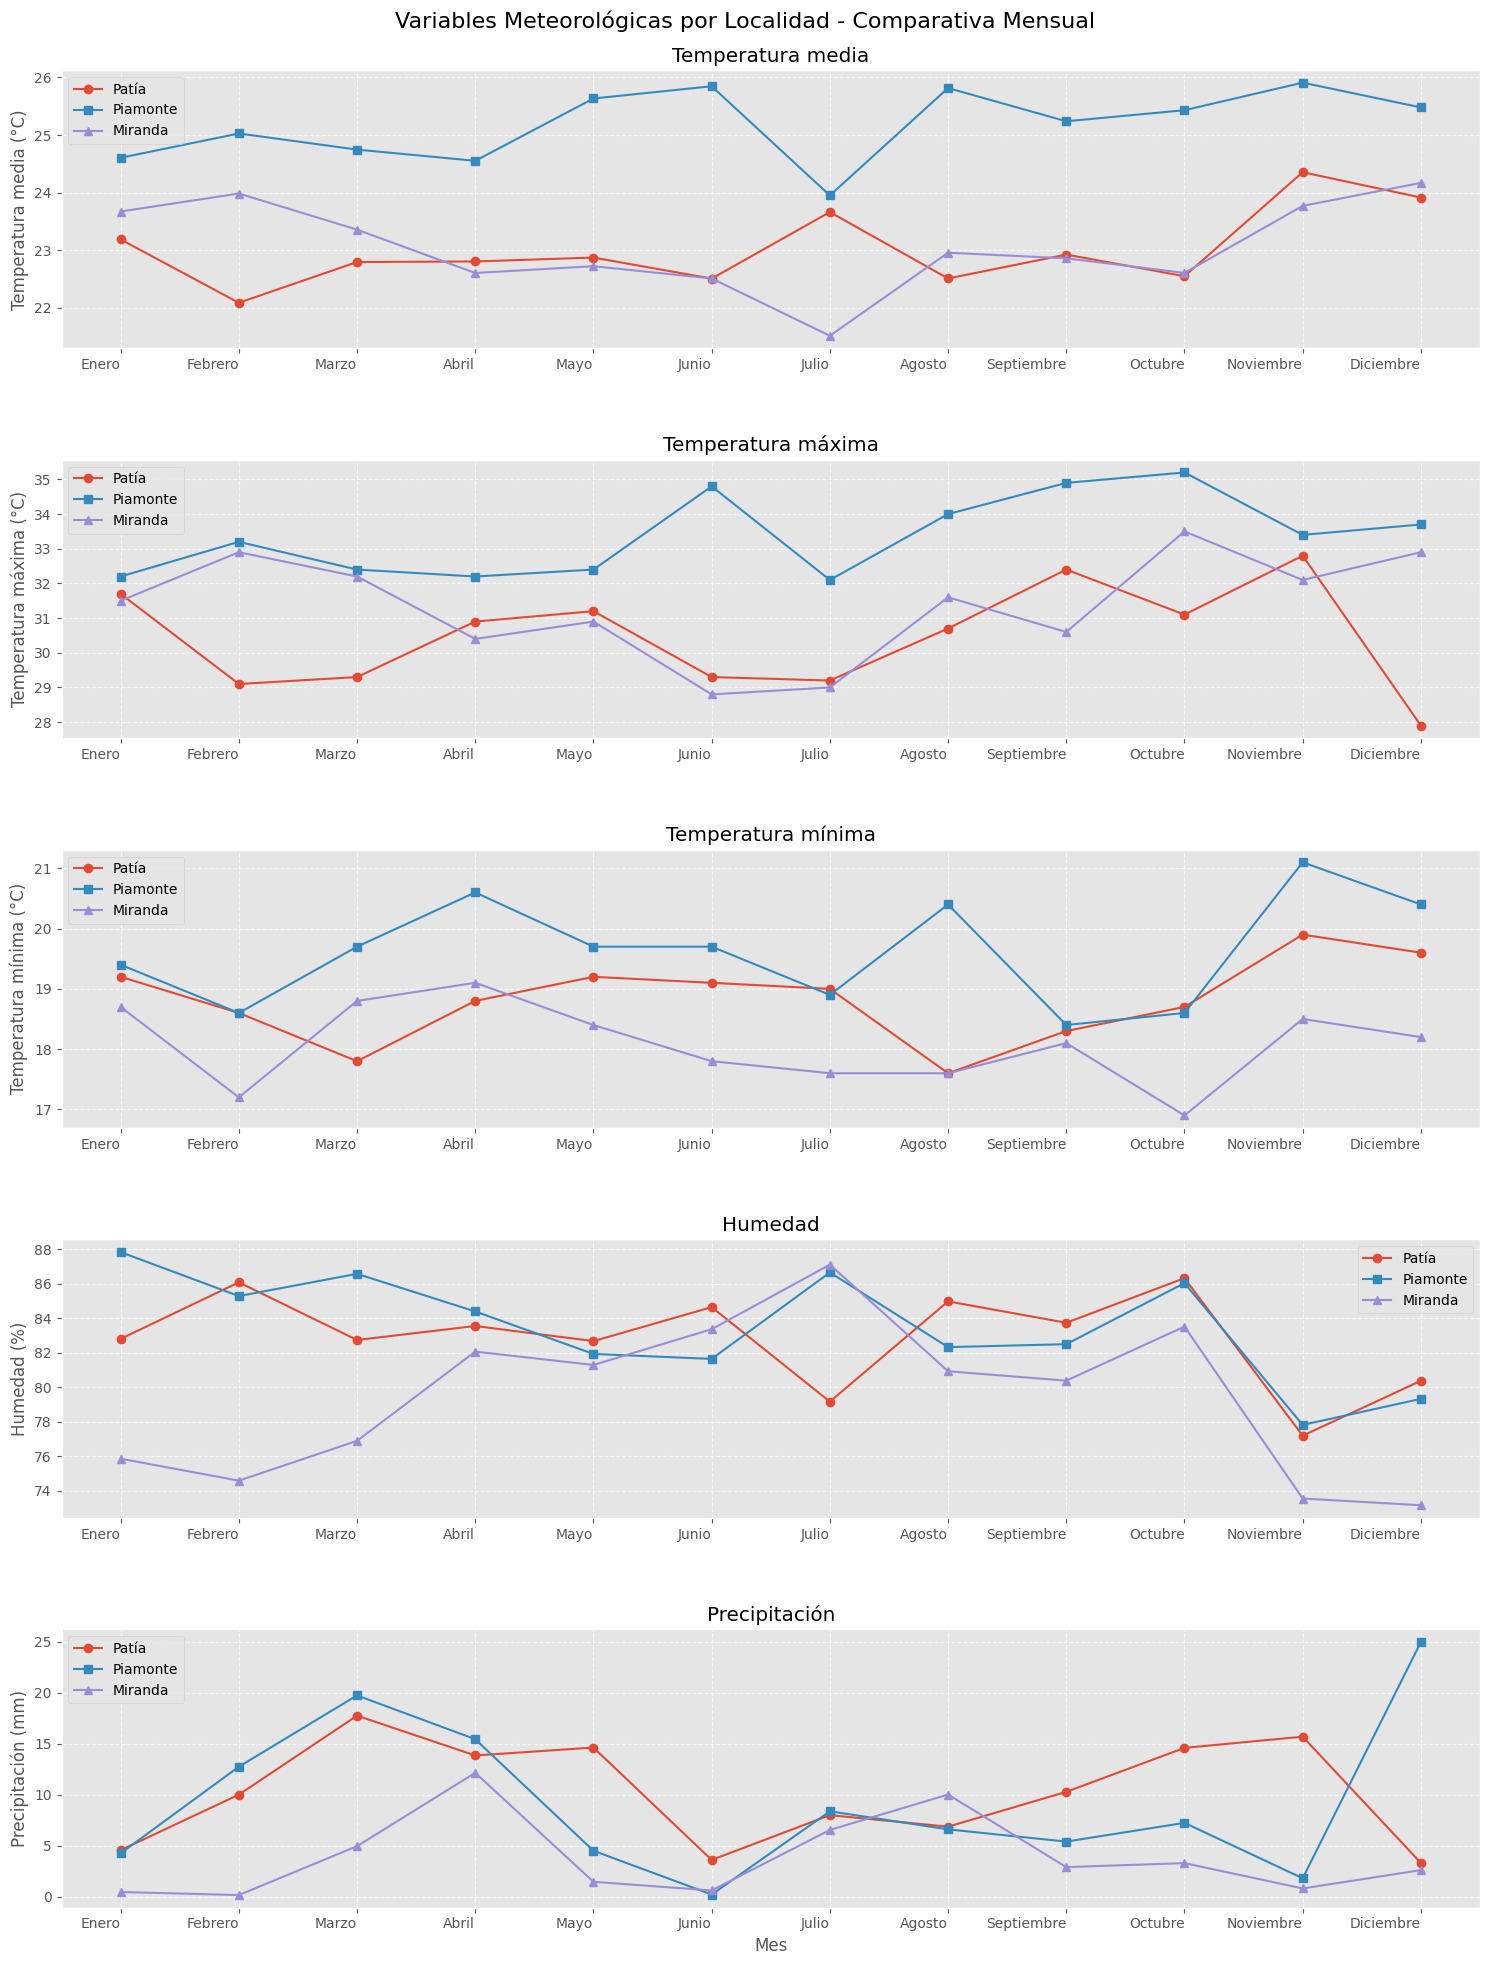

In [36]:
# Create a figure with subplots for each meteorological variable
fig, axs = plt.subplots(5, 1, figsize=(15, 20), sharex=False)

# Common x-axis for all the months to ensure proper ordering
x_order = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

# 1. Temperature media
axs[0].plot(df_meteorologico_patia_grouped['Fecha'], df_meteorologico_patia_grouped['Temperatura media (°C)'], marker='o', label='Patía')
axs[0].plot(df_meteorologico_piamonte_grouped['Fecha'], df_meteorologico_piamonte_grouped['Temperatura media (°C)'], marker='s', label='Piamonte')
axs[0].plot(df_meteorologico_miranda_grouped['Fecha'], df_meteorologico_miranda_grouped['Temperatura media (°C)'], marker='^', label='Miranda')
axs[0].set_ylabel('Temperatura media (°C)')
axs[0].set_title('Temperatura media')
axs[0].grid(True, linestyle='--', alpha=0.7)
axs[0].legend()
axs[0].set_xticks(range(len(x_order)))
axs[0].set_xticklabels(x_order, rotation=0, ha='right')
axs[0].set_xlim(-0.5, len(x_order) - 0.5)

# 2. Temperature maxima
axs[1].plot(df_meteorologico_patia_grouped['Fecha'], df_meteorologico_patia_grouped['Temperatura máxima (°C)'], marker='o', label='Patía')
axs[1].plot(df_meteorologico_piamonte_grouped['Fecha'], df_meteorologico_piamonte_grouped['Temperatura máxima (°C)'], marker='s', label='Piamonte')
axs[1].plot(df_meteorologico_miranda_grouped['Fecha'], df_meteorologico_miranda_grouped['Temperatura máxima (°C)'], marker='^', label='Miranda')
axs[1].set_ylabel('Temperatura máxima (°C)')
axs[1].set_title('Temperatura máxima')
axs[1].grid(True, linestyle='--', alpha=0.7)
axs[1].legend()
axs[1].set_xticks(range(len(x_order)))
axs[1].set_xticklabels(x_order, rotation=0, ha='right')
axs[1].set_xlim(-0.5, len(x_order) - 0.5)

# 3. Temperature minima
axs[2].plot(df_meteorologico_patia_grouped['Fecha'], df_meteorologico_patia_grouped['Temperatura mínima (°C)'], marker='o', label='Patía')
axs[2].plot(df_meteorologico_piamonte_grouped['Fecha'], df_meteorologico_piamonte_grouped['Temperatura mínima (°C)'], marker='s', label='Piamonte')
axs[2].plot(df_meteorologico_miranda_grouped['Fecha'], df_meteorologico_miranda_grouped['Temperatura mínima (°C)'], marker='^', label='Miranda')
axs[2].set_ylabel('Temperatura mínima (°C)')
axs[2].set_title('Temperatura mínima')
axs[2].grid(True, linestyle='--', alpha=0.7)
axs[2].legend()
axs[2].set_xticks(range(len(x_order)))
axs[2].set_xticklabels(x_order, rotation=0, ha='right')
axs[2].set_xlim(-0.5, len(x_order) - 0.5)

# 4. Humedad
axs[3].plot(df_meteorologico_patia_grouped['Fecha'], df_meteorologico_patia_grouped['Humedad (%)'], marker='o', label='Patía')
axs[3].plot(df_meteorologico_piamonte_grouped['Fecha'], df_meteorologico_piamonte_grouped['Humedad (%)'], marker='s', label='Piamonte')
axs[3].plot(df_meteorologico_miranda_grouped['Fecha'], df_meteorologico_miranda_grouped['Humedad (%)'], marker='^', label='Miranda')
axs[3].set_ylabel('Humedad (%)')
axs[3].set_title('Humedad')
axs[3].grid(True, linestyle='--', alpha=0.7)
axs[3].legend()
axs[3].set_xticks(range(len(x_order)))
axs[3].set_xticklabels(x_order, rotation=0, ha='right')
axs[3].set_xlim(-0.5, len(x_order) - 0.5)

# 5. Precipitación
axs[4].plot(df_meteorologico_patia_grouped['Fecha'], df_meteorologico_patia_grouped['Precipitación (mm)'], marker='o', label='Patía')
axs[4].plot(df_meteorologico_piamonte_grouped['Fecha'], df_meteorologico_piamonte_grouped['Precipitación (mm)'], marker='s', label='Piamonte')
axs[4].plot(df_meteorologico_miranda_grouped['Fecha'], df_meteorologico_miranda_grouped['Precipitación (mm)'], marker='^', label='Miranda')
axs[4].set_ylabel('Precipitación (mm)')
axs[4].set_xlabel('Mes')
axs[4].set_title('Precipitación')
axs[4].grid(True, linestyle='--', alpha=0.7)
axs[4].legend()
axs[4].set_xticks(range(len(x_order)))
axs[4].set_xticklabels(x_order, rotation=0, ha='right')
axs[4].set_xlim(-0.5, len(x_order) - 0.5)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.95, hspace=0.4)  # Increased spacing between subplots

# Add an overall title
fig.suptitle('Variables Meteorológicas por Localidad - Comparativa Mensual', fontsize=16, y=0.98)

plt.show()


In [37]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

def group_by_coordinates(df, value_column, sort_ascending=False):
    return df.groupby(['lon', 'lat']).agg({
        value_column: 'mean'
    }).reset_index().sort_values(value_column, ascending=sort_ascending)
    
def plot_geographic_variables(dataframes, value_columns, titles, cmaps=None):
    if cmaps is None:
        cmaps = ['coolwarm'] * len(dataframes)
    
    # Create figure with subplots
    fig, axes = plt.subplots(1, len(dataframes), figsize=(14, 4))
    
    # If only one dataframe is provided, axes will not be an array
    if len(dataframes) == 1:
        axes = [axes]
    
    for i, (df, value_column, title, cmap) in enumerate(zip(dataframes, value_columns, titles, cmaps)):
        # Create geometry points
        geometry = [Point(lon, lat) for lon, lat in zip(df['lon'], df['lat'])]
        
        # Create GeoDataFrame
        gdf = gpd.GeoDataFrame(df, geometry=geometry)
        
        # Plot on the corresponding subplot
        gdf.plot(ax=axes[i], column=value_column, cmap=cmap, legend=True,
            legend_kwds={'label': f"Average {value_column.replace('_', ' ').title()}",
                'orientation': "horizontal"})
        
        axes[i].set_title(title)
        axes[i].set_xlabel('Longitud')
        axes[i].set_ylabel('Latitud')
    
    plt.tight_layout()
    return fig, axes

## **Análisis de diversidad de especies**

###  **Cantidad de ejemplares por especie**

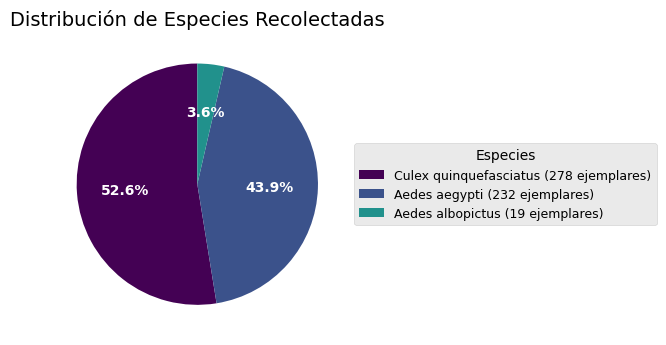

In [38]:
sc = df_entomologico['scientificName'].value_counts()

# Create a smaller figure and axis
fig, ax = plt.subplots(figsize=(6, 5))

# Define colors
colors = plt.cm.viridis(np.linspace(0, 0.5, len(sc)))

# Create pie chart with white percentage text
wedges, texts, autotexts = ax.pie(
    sc.values, 
    labels=None,
    autopct='%1.1f%%',
    colors=colors,
    textprops={'fontsize': 10, 'weight': 'bold', 'color': 'white'},  # Added white color
    startangle=90
)

# Create a legend with species names and counts
legend_labels = [f"{name} ({count} ejemplares)" for name, count in zip(sc.index, sc.values)]
ax.legend(wedges, legend_labels, title="Especies", loc="center left", 
          bbox_to_anchor=(1, 0, 0.5, 1), fontsize=9)

plt.title('Distribución de Especies Recolectadas', fontsize=14)
plt.tight_layout()
plt.show()

# Display table with percentages
sc_percent = pd.DataFrame({
    'Cantidad': sc.values,
    'Porcentaje': np.round((sc.values / sc.values.sum()) * 100, 2)
}, index=sc.index).sort_values('Cantidad', ascending=False).reset_index()

In [39]:
import re

# Create the base location_diversity with summary statistics
location_diversity = df_entomologico.groupby('locality').agg({
    'individualCount': 'count',
    'scientificName': pd.Series.nunique
}).reset_index().rename(columns={
    'individualCount': 'Total de individuos',
    'scientificName': 'Especies únicas',
})

# Standardize the locality names
location_diversity['locality'] = location_diversity['locality'].str.replace(
    r'^Casa ubicada en el barrio (.+) de (.+)$', r'\1 (\2)',
    regex=True
)

# Create a pivot table with counts for each species at each location
species_pivot = df_entomologico.pivot_table(
    index='locality', 
    columns='scientificName', 
    values='individualCount', 
    aggfunc='count',
    fill_value=0
)

# Apply the same locality name standardization to the pivot table
species_pivot.index = species_pivot.index.str.replace(
    r'^Casa ubicada en el barrio (.+) de (.+)$', r'\1 (\2)',
    regex=True
)

# Reset index to prepare for merge
species_pivot = species_pivot.reset_index()

# Merge the two DataFrames
location_diversity = location_diversity.merge(species_pivot, on='locality')

location_diversity = location_diversity.sort_values('Total de individuos', ascending=False)

location_diversity

,locality,Total de individuos,Especies únicas,Aedes aegypti,Aedes albopictus,Culex quinquefasciatus
10,Olaya Herrera (Patía (El Bordo)),94,3,45,6,43
16,Villa los Prados (Piamonte),49,3,7,4,38
5,Fundadores (Piamonte),48,2,11,0,37
8,La Paz (Piamonte),44,3,10,1,33
15,San Antonio (Miranda),41,3,25,1,15
12,Porvenir (Miranda),36,2,20,0,16
7,La Cabaña (Miranda),32,2,26,0,6
13,Postobón (Patía (El Bordo)),28,3,4,2,22
11,Popular (Patía (El Bordo)),26,2,10,0,16
9,Libertador (Patía (El Bordo)),22,3,7,1,14


<Figure size 1800x1400 with 0 Axes>

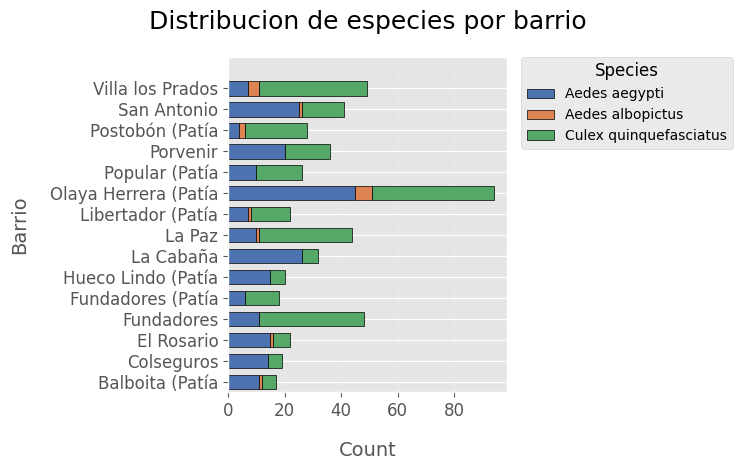

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract Barrio from locality column
location_diversity['Barrio'] = location_diversity['locality'].str.extract(r'(.+) \(', expand=False).str.strip()

# Select only the species columns
species_columns = [col for col in location_diversity.columns 
    if col not in ['locality', 'Total de individuos', 'Especies únicas', 'Barrio']]

# Prepare data for stacked bar chart
melted_data = location_diversity.melt(
    id_vars=['Barrio'],
    value_vars=species_columns,
    var_name='Species',
    value_name='Count'
)

# Get top 15 barrios by total count to reduce clutter
top_barrios = location_diversity.groupby('Barrio')['Total de individuos'].sum().nlargest(15).index
filtered_data = melted_data[melted_data['Barrio'].isin(top_barrios)]

# Create a pivot table with Barrio as index and Species as columns
pivot_data = filtered_data.pivot_table(index='Barrio', columns='Species', values='Count', fill_value=0)

# Set up color palette
colors = sns.color_palette("deep", len(species_columns))

# Create the plot
plt.figure(figsize=(18, 14))  # Increased height to allow for more spacing

# Create the stacked horizontal bar chart - using barh instead of bar
# Reduce width to create spacing between bars
ax = pivot_data.plot(kind='barh', stacked=True, color=colors, width=0.7, edgecolor='black', linewidth=0.5)

# Add more spacing between bars
plt.subplots_adjust(hspace=0.5)

# Enhance the plot
plt.title('Distribucion de especies por barrio', fontsize=18, pad=20)
plt.ylabel('Barrio', fontsize=14, labelpad=15)
plt.xlabel('Count', fontsize=14, labelpad=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

# Add grid lines for better readability
plt.grid(axis='x', linestyle='--', alpha=0.3)

# Move the legend to the right side outside the plot
plt.legend(title='Species', title_fontsize=12, fontsize=10, 
    bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# Increase spacing between bars using the y-axis properties
ax.set_ylim(-0.5, len(pivot_data.index) - 0.5 + 1)  # Add extra space

# Ensure the layout is not cut off
plt.tight_layout()
plt.subplots_adjust(right=0.8)

# Show the plot
plt.show()

In [41]:
df_cases = df_cases.drop(columns=['OBJECTID', 'Loc_name', 'Match_addr', 'Pertenencia etnica', 'fec_consulta', 'ini_sintomas', 'locationID', 'Ocupación '])

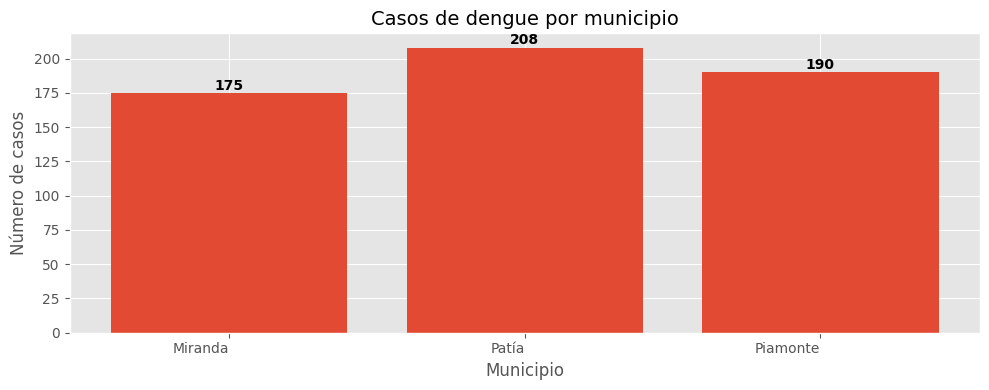

In [70]:
df_cases.rename(columns={'county': 'Barrio'}, inplace=True)

# create a new column that represents the primary key of this dataframe, i want it to be an auto-incrementing integer
df_cases['id'] = df_cases.index

casos_dengue_municipio = df_cases.groupby('Barrio').agg({
    'id': 'count',
}).reset_index().rename(columns={'id': 'Casos'})

# Create figure with better size ratio for bar chart
plt.figure(figsize=(10, 4))

# Create the bar chart
bars = plt.bar(casos_dengue_municipio['Barrio'], casos_dengue_municipio['Casos'])

# Add title and labels with better styling
plt.title('Casos de dengue por municipio', fontsize=14)
plt.xlabel('Municipio', fontsize=12)
plt.ylabel('Número de casos', fontsize=12)

# Add count values on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{int(height)}', ha='center', va='bottom', fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=0, ha='right')

# Adjust layout
plt.tight_layout()
plt.show()



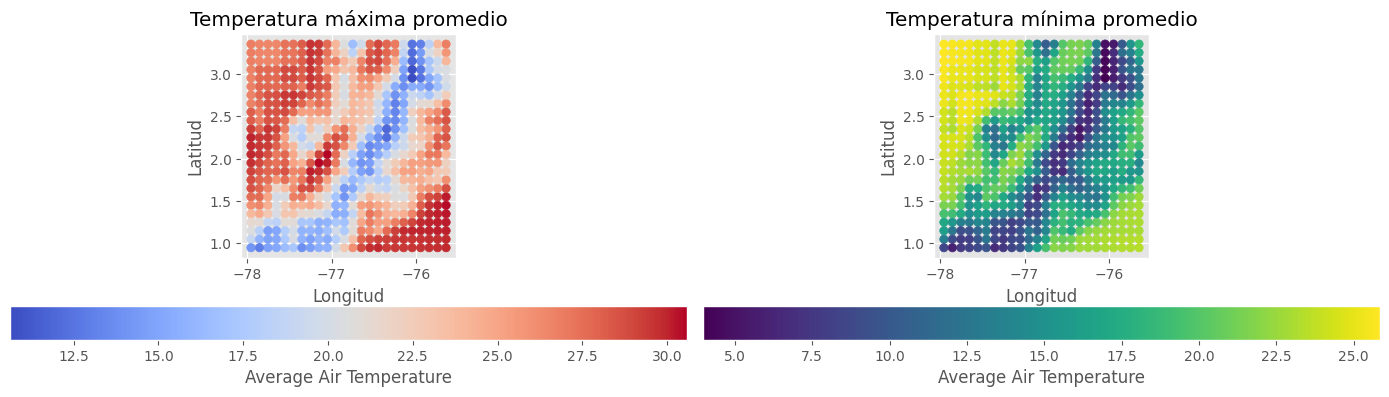

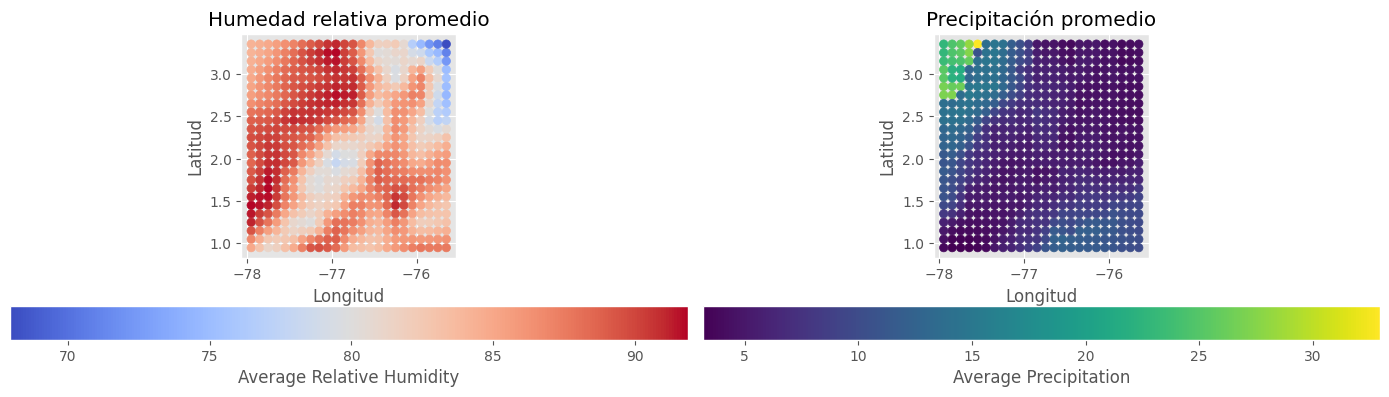

In [43]:
df_humedad_relativa_grouped = group_by_coordinates(df_humedad_relativa, 'relative_humidity')
df_precipitacion_grouped = group_by_coordinates(df_precipitacion, 'precipitation')
df_temp_max_grouped = group_by_coordinates(df_temp_max, 'air_temperature')
df_temp_min_grouped = group_by_coordinates(df_temp_min, 'air_temperature')

plot_geographic_variables(
    dataframes=[df_temp_max_grouped, df_temp_min_grouped],
    value_columns=['air_temperature', 'air_temperature'],
    titles=['Temperatura máxima promedio', 'Temperatura mínima promedio'],
    cmaps=['coolwarm', 'viridis']
)

plt.show()

plot_geographic_variables(
    dataframes=[df_humedad_relativa_grouped, df_precipitacion_grouped],
    value_columns=['relative_humidity', 'precipitation'],
    titles=['Humedad relativa promedio', 'Precipitación promedio'],
    cmaps=['coolwarm', 'viridis']
)

plt.show()

<Figure size 2400x1200 with 0 Axes>

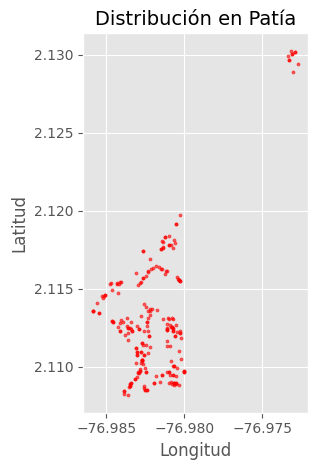

<Figure size 1600x800 with 0 Axes>

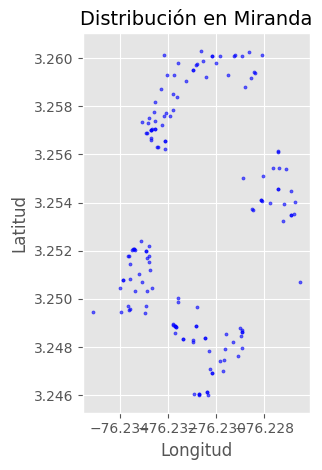

<Figure size 1600x800 with 0 Axes>

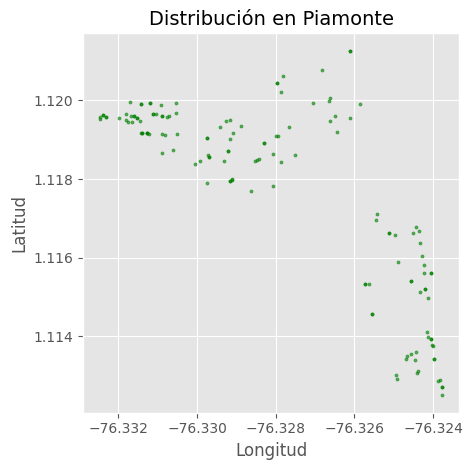

In [44]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

# Get location data
df_location = df_entomologico[['county', 'decimalLatitude', 'decimalLongitude']]

# Filter by county
df_location_b1 = df_location[df_location['county'] == 'Patía']
df_location_b2 = df_location[df_location['county'] == 'Miranda']
df_location_b3 = df_location[df_location['county'] == 'Piamonte']

# Create GeoDataFrames for each county
gdf_patia = gpd.GeoDataFrame(df_location_b1, geometry=gpd.points_from_xy(df_location_b1.decimalLongitude, df_location_b1.decimalLatitude))
gdf_miranda = gpd.GeoDataFrame(df_location_b2, geometry=gpd.points_from_xy(df_location_b2.decimalLongitude, df_location_b2.decimalLatitude))
gdf_piamonte = gpd.GeoDataFrame(df_location_b3, geometry=gpd.points_from_xy(df_location_b3.decimalLongitude, df_location_b3.decimalLatitude))

# Create first figure for Patía - wider ratio
plt.figure(figsize=(24, 12))
ax = gdf_patia.plot(marker='o', color='red', markersize=5, alpha=0.6)
plt.title('Distribución en Patía', fontsize=14)
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.tight_layout()
plt.show()

# Create second figure for Miranda - wider ratio
plt.figure(figsize=(16, 8))
gdf_miranda.plot(marker='o', color='blue', markersize=5, alpha=0.6)
plt.title('Distribución en Miranda', fontsize=14)
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.tight_layout()
plt.show()

# Create third figure for Piamonte - wider ratio
plt.figure(figsize=(16, 8))
gdf_piamonte.plot(marker='o', color='green', markersize=5, alpha=0.6)
plt.title('Distribución en Piamonte', fontsize=14)
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.tight_layout()
plt.show()